### Install Dependencies

The project was developed on a local machine with a local Jupyter server. Run the commands below to install all dependencies needed to run the notebook!

In [150]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [151]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [152]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [153]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [154]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# The Problem

Developers are constantly bombarded with issues and work long hours with little rest. Even with AI tools, how is one to know what the optimal amount of sleep is? How much use of AI tooling is too much? Let's create a model that will help predict if a programmer's day will be successfull based on factors like the amount of working time, the number of distractions, the number of times AI is used, or previous nights sleep.

# Extract Data

This dataset simulates the productivity of AI developers over 500 days, capturing the subtle interaction between deep work, distractions, caffeine intake, and code quality. Designed to push the limits of machine learning, this data blends behavioral, physiological, and productivity indicators to allow for advanced predictive modeling, regression, clustering, and time-series analysis.
https://www.kaggle.com/datasets/atharvasoundankar/ai-developer-productivity-dataset

In [208]:
import pandas as pd
import kagglehub

from sklearn.model_selection import train_test_split

class DataImport:
    """
    Sets up dataset from Kaggle
    """
    def __init__(self):

        path = kagglehub.dataset_download("atharvasoundankar/ai-developer-productivity-dataset")
        
        print("Path to dataset files:", path)
        
        self.df_train = pd.read_csv(path + '/ai_dev_productivity.csv')
        print(self.df_train)

        self.y = self.df_train['task_success'].values
        print(self.y)
        self.x = self.df_train.drop('task_success', axis=1).values
        print(self.x);
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.25, random_state=5)
        print(self.x_train)
        
        
data = DataImport()

Path to dataset files: /Users/danielbenusovich/.cache/kagglehub/datasets/atharvasoundankar/ai-developer-productivity-dataset/versions/1
     hours_coding  coffee_intake_mg  distractions  sleep_hours  commits  \
0            5.99               600             1          5.8        2   
1            4.72               568             2          6.9        5   
2            6.30               560             1          8.9        2   
3            8.05               600             7          6.3        9   
4            4.53               421             6          6.9        4   
..            ...               ...           ...          ...      ...   
495          6.08               594             1          5.3        3   
496          2.93               382             2          6.7        3   
497          4.62               494             4          7.5        2   
498          3.25               296             6          6.9        1   
499          2.23               252    

In [209]:
print(f"Train sizes: {data.x_train.shape} {data.y_train.shape}")
print(f"Test sizes: {data.x_test.shape} {data.y_test.shape}")
print(f"Sample Size: {data.x.shape} {data.y.shape}")

Train sizes: (375, 8) (375,)
Test sizes: (125, 8) (125,)
Sample Size: (500, 8) (500,)


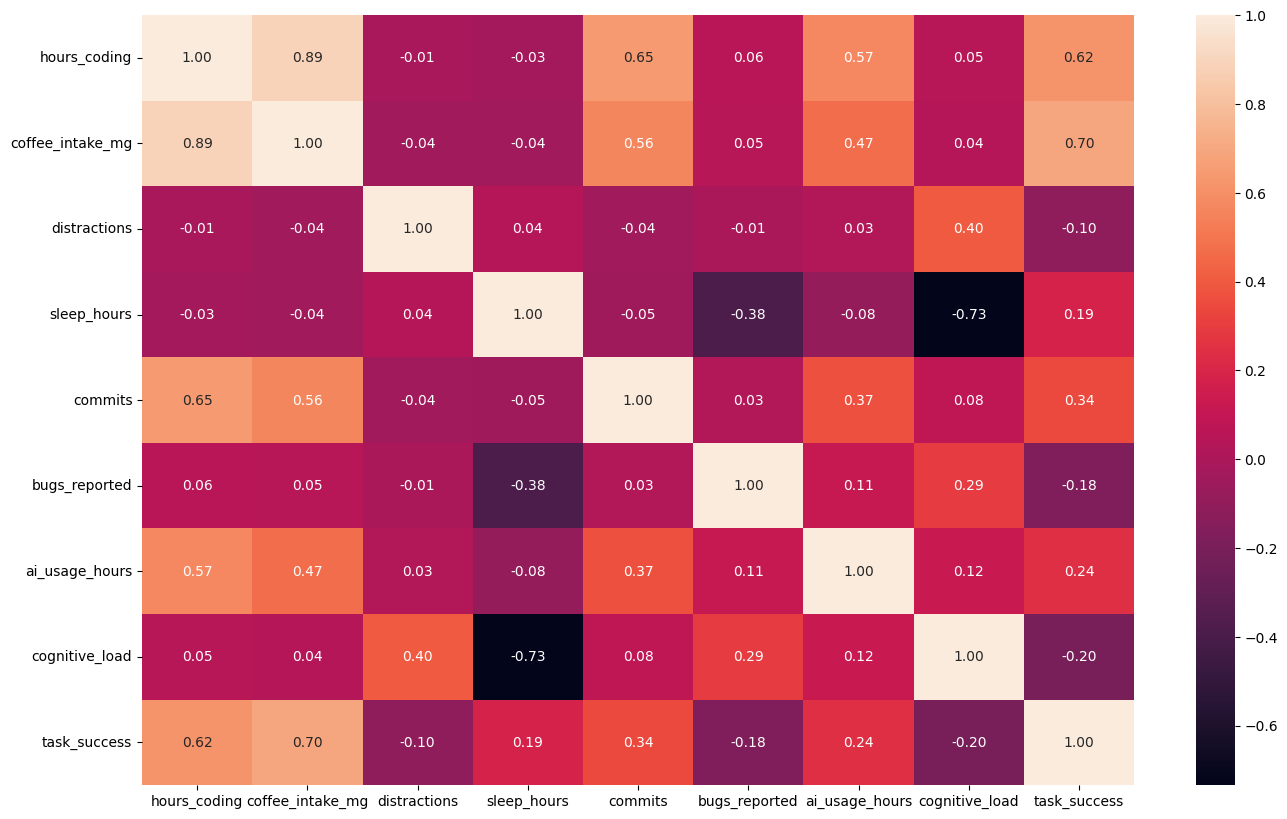

In [210]:
import seaborn

import matplotlib.pyplot as plt

# practice visualizing correlation matrix using a heatmap
# your code here
def MakeHeatMap(data):
    # Sample figsize in inches
    plt.figure(figsize = (16,10))
    seaborn.heatmap(data.corr(), annot=True, fmt=".2f")

MakeHeatMap(data.df_train)

Based on the correlation heat map above, coffee intake is highly correlated to hours worked. We can drop the coffee column to reduce the complexity of the model and improve results.

In [211]:
data.df_train = data.df_train.drop('coffee_intake_mg', axis=1)
data.y = data.df_train['task_success'].values
data.x = data.df_train.drop('task_success', axis=1).values
data.x_train, data.x_test, data.y_train, data.y_test = train_test_split(data.x, data.y, test_size=0.25, random_state=5)

In [212]:
def calculate_precision(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates precision for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    
    # your code here
    tp = 0
    fp = 0
    for i in range(len(y_true)):
        if y_true[i] == pos_label_value and y_pred[i] == pos_label_value:
            tp = tp + 1
        elif y_true[i] != pos_label_value and y_pred[i] == pos_label_value:
            fp = fp + 1
            
    if tp + fp == 0:
        return 0
    return tp / (tp + fp)

def calculate_recall(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates recall for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns recall as a floating point number between 0.0 and 1.0
    '''
    
    # your code here
    tp = 0
    fn = 0
    for i in range(len(y_true)):
        if y_true[i] == pos_label_value and y_pred[i] == pos_label_value:
            tp = tp + 1
        elif y_true[i] == pos_label_value and y_pred[i] != pos_label_value:
            fn = fn + 1
            
    if tp + fn == 0:
        return 0
    return tp / (tp + fn)

# Logistic Regression

Beginning with a simple model, we will use Logistic Regression as a base to determine how well our other models are doing.

In [214]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", max_iter=4000).fit(data.x_train, data.y_train)

y_hat = model.predict(data.x_test)
y_hat = (y_hat >= 0.5).astype(int)
print(y_hat)

print(f"Presicion {calculate_precision(data.y_test, y_hat, 1.0)}")
print(f"Recall {calculate_recall(data.y_test, y_hat, 1.0)}")

[0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0
 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 0 0]
Presicion 0.8961038961038961
Recall 0.8518518518518519


Thatss pretty good! However, as developers we should never settle for a measly 89%! We want an A on this project! Lets try some other models to see if we can improve these numbers.

# KNN

This model makes use of the code from Week 4. We will see if this can beat the Logistic Regression result.

In [215]:
from sklearn.neighbors import BallTree
import numpy as np

class KNN:
    """
    Class to store data for regression problems 
    """
    def __init__(self, x_train, y_train, K=5):
        """
        Creates a kNN instance

        :param x_train: numpy array with shape (n_rows,1)- e.g. [[1,2],[3,4]]
        :param y_train: numpy array with shape (n_rows,)- e.g. [1,-1]
        :param K: The number of nearest points to consider in classification
        """
        
        # Import and build the BallTree on training features 
        self.balltree = BallTree(x_train)
        
        # Cache training labels and parameter K 
        self.y_train = y_train
        self.K = K 
        
    def get_counts(self, neighbors):
        # your code here
        counts = {}
        for i in range(len(neighbors)):
            label = neighbors[i][0]
            if label in counts:
                counts[label] = counts[label] + 1
            else:
                counts[label] = 1

        sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse = True)
        return sorted_counts
        
        
    def majority(self, neighbor_indices, neighbor_distances=None):
        """
        Given indices of nearest neighbors in training set, return the majority label. 
        Break ties by considering 1 fewer neighbor until a clear winner is found. 

        :param neighbor_indices: The indices of the K nearest neighbors in self.X_train 
        :param neighbor_distances: Corresponding distances from query point to K nearest neighbors. 
        """
        
        assert(len(neighbor_indices) == len(neighbor_distances))
        neighbors = []
        for i in range(len(neighbor_indices[0])):
            neighbors.append((self.y_train[neighbor_indices[0][i]], neighbor_distances[0][i]))
        
        counts = self.get_counts(neighbors)
        while (len(counts) > 1 and counts[0][1] == counts[1][1]):
            neighbors.pop()
#             print("pop")
            counts = self.get_counts(neighbors)
            
        return counts[0][0]
        
        
            
        
    def classify(self, x):
        """
        Given a query point, return the predicted label 
        
        :param x: a query point stored as an ndarray  
        """
        # your code here
        q = x.reshape(1, -1)
        d, i = self.balltree.query(q, self.K)
        return self.majority(i, d)
        
        
    def predict(self, X):
        """
        Given an ndarray of query points, return yhat, an ndarray of predictions 

        :param X: an (m x p) dimension ndarray of points to predict labels for 
        """
        # your code here
        y = []
        for i in range(len(X)):
            y.append(self.classify(X[i]))
        return np.array(y)

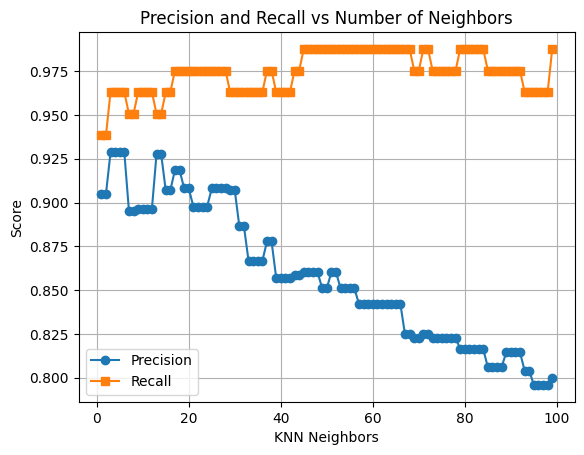

In [216]:
import matplotlib.pylab as plt

knn_results = []

for i in range(1,100):
    model = KNN(data.x_train, data.y_train, K=i)
    yhat = model.predict(data.x_test)
    # print(yhat)
    yhat = (yhat >= 0.5).astype(int)
    knn_results.append((calculate_precision(data.y_test, yhat, 1.0), calculate_recall(data.y_test, yhat, 1.0)))

# Split into two separate lists: precision and recall
precision, recall = zip(*knn_results)

# X values from 1 to len(data)
x_axis = list(range(1, len(knn_results) + 1))

# Plotting
plt.plot(x_axis, precision, label='Precision', marker='o')
plt.plot(x_axis, recall, label='Recall', marker='s')

plt.xlabel('KNN Neighbors')
plt.ylabel('Score')
plt.title('Precision and Recall vs Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

We would like to select the highest precision paired with the highest recall. So lets do that!

In [217]:
max_value = knn_results[0][0] + knn_results[0][1]
index = 0

for i in range(len(knn_results)):
    val = knn_results[i]
    if (val[0] + val[1] > max_value):
        index = i
        max_value = val[0] + val[1]

print(f"Best Number of Neighbors {index} Precision {knn_results[index][0]} Recall {knn_results[index][1]}")

Best Number of Neighbors 16 Precision 0.9186046511627907 Recall 0.9753086419753086


Success! We have improved as compared to the Logistic Regression! We not set at a 91% presicion! Even so, this is an A- and not the vaunted A we want! Lets keep going onto another more advanced model.

# AdaBoost Classifier

Moving onto Week 5, lets see how AdaBoost can perform compared to the KNN. Instead of using our implementation from the lab, I opted to use the better AdaBoostClassifier created by SKLearn.

In [220]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_results = {}

for rate in np.arange(0.1, 20, 0.5):
    for estimators in range(1,200,20):
        model = AdaBoostClassifier(learning_rate=rate, n_estimators=estimators).fit(data.x_train, data.y_train)
        adaboost_results[(rate, estimators)] = model.score(data.x_test, data.y_test) * 100

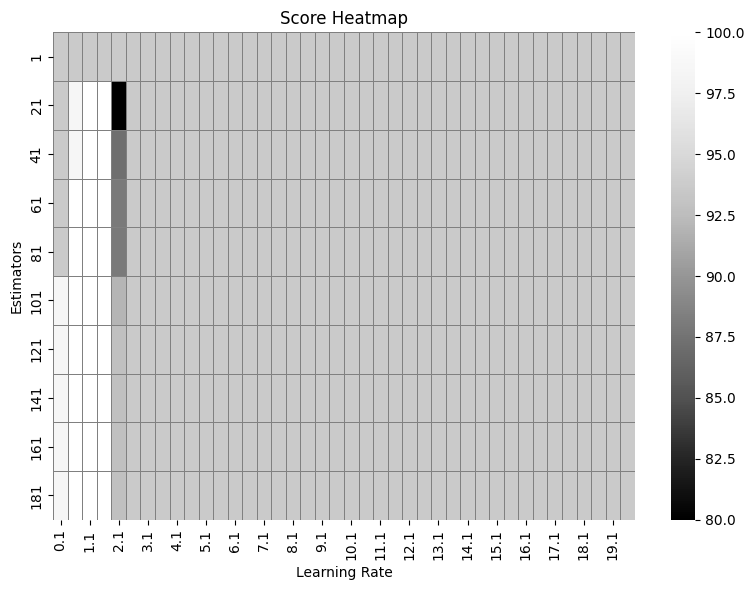

In [221]:
import seaborn

# Convert to a DataFrame
df = pd.DataFrame.from_dict(adaboost_results, orient='index', columns=['score'])
df.index = pd.MultiIndex.from_tuples(df.index, names=['rate', 'estimators'])
df = df.reset_index()
pivot_table = df.pivot(index='estimators', columns='rate', values='score')

# Create heatmap
plt.figure(figsize=(8, 6))
seaborn.heatmap(pivot_table, cmap='Greys_r', vmin=80, vmax=100, cbar=True, linewidths=0.5, linecolor='gray')
plt.title('Score Heatmap')
plt.xlabel('Learning Rate')
plt.ylabel('Estimators')
plt.tight_layout()
plt.show()

Looking pretty good! We can see that as the learning rate increases beyond 2.1 we see a clear drop in score. Additionally, larger estimator counts have little impact once a proper learning rate is found. Lets find one of the best values.

In [223]:
max_value = 0
max_key = {}

for key, value in adaboost_results.items():
    if value > max_value:
        max_key = key 
        max_value = value

print(max_key)
print(f"Best Configuration - Rate {max_key[0]} Estimators {max_key[1]} Score {max_value}")

(np.float64(0.6), 61)
Best Configuration - Rate 0.6 Estimators 61 Score 100.0


Well that looks great! We have a 100% match rate using AdaBoost. Much better than KNN.

Selecting AdaBoost as our chosen classifier, we can now predict whether or not we will be successful withour programming tasks today! Hooray!